# **3장. 퇴근시간 버스 승차인원 예측**

## **1. 문제 정의 및 탐색적 데이터 분석** 

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/스마클_21-1 데이터분석/데이콘 3장/데이콘3장데이터/train.csv')
test = pd.read_csv('/content/drive/MyDrive/스마클_21-1 데이터분석/데이콘 3장/데이콘3장데이터/test.csv')
bts = pd.read_csv('/content/drive/MyDrive/스마클_21-1 데이터분석/데이콘 3장/데이콘3장데이터/bus_bts.csv')
submit = pd.read_csv('/content/drive/MyDrive/스마클_21-1 데이터분석/데이콘 3장/데이콘3장데이터/submission_sample.csv')

- ( train, test , bus_bts 공통 사항)

해당 데이터에는 버스카드를 통해 결제를 한 경우에 대한 정류소 승, 하차 데이터로 모든 승차정보의 경우는 기록이 되어있지만, 

버스에서 하차를 할 때, 버스카드를 찍지 않는 경우, 해당 기록이 비어 있는 상태입니다. 따라서, 승차 인원수와 하차 인원수가 동일하지 않고 다소 차이가 있음을 미리 알려드립니다.



- (train, test csv 공통사항)

해당 버스정류장에 대한 각각의 위도, 경도가 제공이 되어있는 상태로 같은 정류장 이름이지만 위도와 경도가 서로 다른 경우가 존재합니다. 

해당 경우는, 같은 정류장 이름을 가지고 있는 길 건너편의 정류장에 해당이 됩니다.

In [ ]:
train.info()
train.head(5)
# id : 식별 번호
# date : 날짜
# bus_route_id : 버스 노선 id
# in_out : 시내/시외 버스 구분
# station_code : 해당 승하차 정류소의 id
# station_name : 해당 승하차 정류소의 이름
# latitude : 해당 버스 정류장의 위도
# longitude : 해당 버스 정류장의 경도
# [x]~[y]_ride : 해당 시간대별 승차 인원수
# [x]~[y]_takeoff : 해당 시간대별 하차 인원수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


- 결측치 없음
- object 형 몇개 처리해야 함
- train 데이터에만 18~20시 승차 데이터 존재

In [ ]:
# 버스 카드별 승하차 정보
bts.info()
bts.head(5)

# user_card_id : 해당 승객의 버스 카드 id
# bus_route_id : 버스 노선 id
# vhc_id : 버스 차량 id

# geton_date : 해당 승객이 탑승한 날짜
# geton_time : 해당 승객이 탑승한 시간
# geton_station_code : 승차 정류소의 id
# geton_station_name : 승차 정류소의 이름

# getoff_date : 해당 승객이 하차한 날짜
# getoff_time : 해당 승객이 하차한 시간
# getoff_station_code : 하차 정류소의 id
# getoff_station_name : 하차 정류소의 이름

# user_category : 승객 구분
# user_count : 해당 버스 카드로 계산한 인원수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_card_id         float64
 1   bus_route_id         int64  
 2   vhc_id               int64  
 3   geton_date           object 
 4   geton_time           object 
 5   geton_station_code   int64  
 6   geton_station_name   object 
 7   getoff_date          object 
 8   getoff_time          object 
 9   getoff_station_code  float64
 10  getoff_station_name  object 
 11  user_category        int64  
 12  user_count           int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB


,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


- 결측치 정보 안보여서 다시 설정

In [ ]:
bts.info(null_counts=True) # getoff에 관한 결측치 : 승객이 하차 태그를 하지 않으면 발생

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_card_id         2409414 non-null  float64
 1   bus_route_id         2409414 non-null  int64  
 2   vhc_id               2409414 non-null  int64  
 3   geton_date           2409414 non-null  object 
 4   geton_time           2409414 non-null  object 
 5   geton_station_code   2409414 non-null  int64  
 6   geton_station_name   2409365 non-null  object 
 7   getoff_date          1513678 non-null  object 
 8   getoff_time          1513678 non-null  object 
 9   getoff_station_code  1513678 non-null  float64
 10  getoff_station_name  1513639 non-null  object 
 11  user_category        2409414 non-null  int64  
 12  user_count           2409414 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB


6   geton_station_name    
 7   getoff_date          
 8   getoff_time          
 9   getoff_station_code  
 10  getoff_station_name  
 에 결측치 존재
 - 하차 정보는 하차태그를 하지 않아서 생긴 결측치
 - 승차 정류소 이름 결측치는 geton_station_code 변수로 대체 가능하다고 생각해서 중요하게 생각하지 않음

In [ ]:
test.info()
test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228170 entries, 0 to 228169
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             228170 non-null  int64  
 1   date           228170 non-null  object 
 2   bus_route_id   228170 non-null  int64  
 3   in_out         228170 non-null  object 
 4   station_code   228170 non-null  int64  
 5   station_name   228170 non-null  object 
 6   latitude       228170 non-null  float64
 7   longitude      228170 non-null  float64
 8   6~7_ride       228170 non-null  float64
 9   7~8_ride       228170 non-null  float64
 10  8~9_ride       228170 non-null  float64
 11  9~10_ride      228170 non-null  float64
 12  10~11_ride     228170 non-null  float64
 13  11~12_ride     228170 non-null  float64
 14  6~7_takeoff    228170 non-null  float64
 15  7~8_takeoff    228170 non-null  float64
 16  8~9_takeoff    228170 non-null  float64
 17  9~10_takeoff   228170 non-nul

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- test 데이터에는 18~20시 승차인원 정보가 없다.
- 결측치 없음


In [ ]:
submit.info()
submit.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228170 entries, 0 to 228169
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   id          228170 non-null  int64
 1   18~20_ride  228170 non-null  int64
dtypes: int64(2)
memory usage: 3.5 MB


,id,18~20_ride
0,415423,0
1,415424,0
2,415425,0
3,415426,0
4,415427,0
...,...,...
95,415518,0
96,415519,0
97,415520,0
98,415521,0


### **데이터 시각화**

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 학습 데이터의 훼손을 막기 위한 복사본 생성
traindata = train.copy()
traindata

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 타깃변수(퇴근시간 승차인원) 시각화

- 변수값의 대부분이 0~5구간에 존재.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


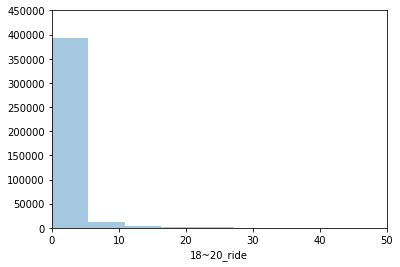

In [ ]:
# 타겟 변수(퇴근 시간 승차 인원) 분포 시각화
sns.distplot(traindata['18~20_ride'], kde = False, bins = 50) #kde bool, 선택 사항 ,가우스 커널 밀도 추정치를 플로팅할지 여부입니다.
plt.axis([0, 50, 0, 450000]) # [x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값]
plt.show() 
# 퇴근 시간 승차 인원이 0~5명 구간에 대부분 존재

- 0~5 구간의 데이터 분포 보기

In [ ]:
traindata.groupby('18~20_ride').size().head(6)


#traindata_gr


18~20_ride
0.0    296528
1.0     44268
2.0     23752
3.0     13560
4.0      8630
5.0      5911
dtype: int64

- 절반 이상의 데이터 0

##### 날짜 데이터 변환

- 2019년 9월1일은 일요일
- 월화수 승차인원 많고 , 금토일 비교적 적음
- 주말엔 출근하지 않는 사람이 많기 때문인 것으로 예상

No handles with labels found to put in legend.


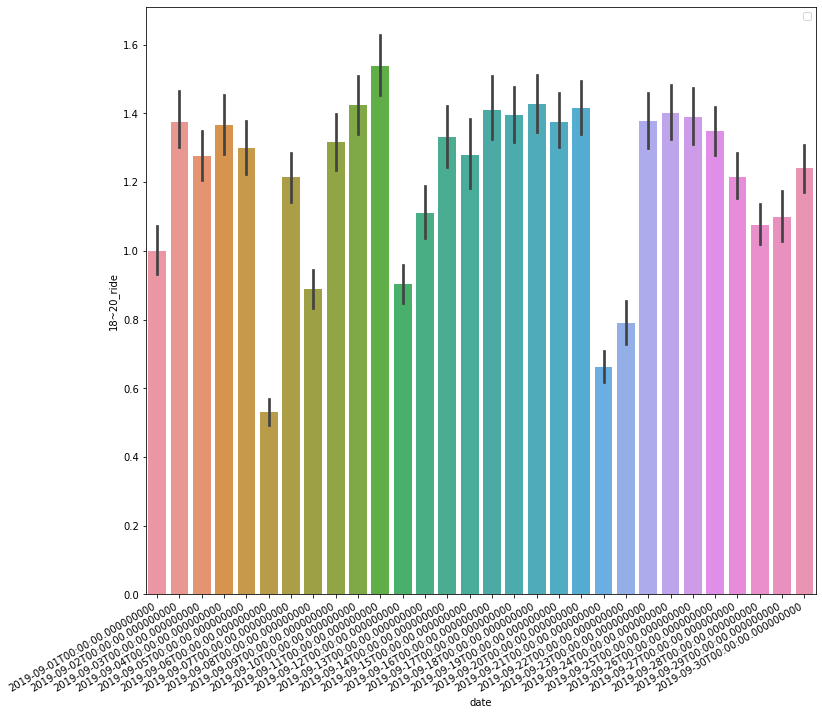

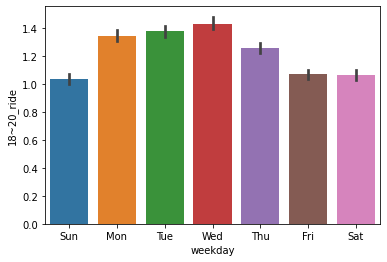

In [ ]:
# 날짜형으로 변환
traindata['date'] = pd.to_datetime(train['date'])
# 요일을 문자형으로 추출해 변수 생성
traindata['weekday'] = traindata['date'].dt.strftime('%a')

# 날짜별 승차인원 시각화
plt.figure(figsize=(12, 12))
sns.barplot(x="date", y="18~20_ride", data=traindata)
plt.gcf().autofmt_xdate() # x축의 라벨이 서로 겹치지 않도록 설정
plt.legend(loc=0) # 그래프 상에서 최적의 위치에 범례 표시
plt.show()
# 요일별 퇴근 시간 평균 탑승객 수 시각화
sns.barplot(x="weekday", y="18~20_ride", data=traindata)
plt.show()

##### 버스 종류별 퇴근 시간 평균 탑승객 수 시각화

- 시내 버스가 더 많다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text

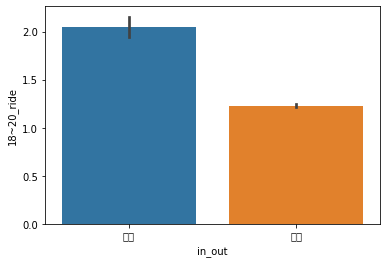

In [ ]:
# 버스 종류별 퇴근 시간 평균 탑승객 수 시각화

sns.barplot(x="in_out", y="18~20_ride", data=traindata)

plt.show()

In [ ]:
# 일별 출퇴근 시간의 총 승차 인원 데이터 생성
# 출근시간(8시~10시)과 퇴근시간(18시~20시)에 탑승객 수가 어떤 양상을 띄는지 확인
# 출근시간 8~9시와 9~10시 데이터 합치기

traindata['8~10_ride'] = traindata['8~9_ride'] + traindata['9~10_ride']
eda_data = traindata.groupby('date')[['18~20_ride','8~10_ride']].agg('sum').reset_index() # 닐찌뱔로 그룹만든 다음 더한다.

eda_data.head(3)

,date,18~20_ride,8~10_ride
0,2019-09-01,11537.0,11957.0
1,2019-09-02,20561.0,21844.0
2,2019-09-03,19743.0,25756.0


#####일별 출퇴근 시간 탑승객 수 시각화 
- 출퇴근 시간 승차인원이 거의 비슷한 것을 알 수 있다.
- 퇴근시간 승차인원이 약간 적은 것은 출근시간은 거의 동일 하지만 퇴근 시간은 비교적 달라서 그럿 것으로 생각한다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53748 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_

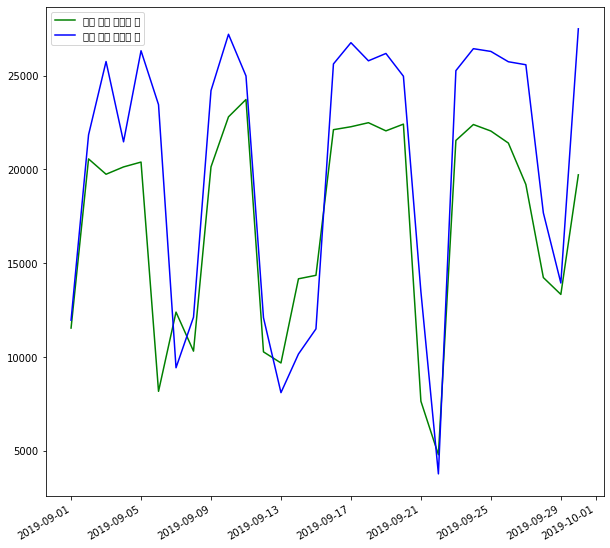

In [ ]:
# 일별 출퇴근 시간 탑승객 수 시각화
plt.figure(figsize=(10, 10))
plt.plot("date", "18~20_ride", "g-", label = "퇴근 시간 탑승객 수", data=eda_data)
plt.plot("date", "8~10_ride", "b-", label = "출근 시간 탑승객 수", data=eda_data)
plt.gcf().autofmt_xdate() # x축의 라벨이 서로 겹치지 않도록 설정
plt.legend(loc=0) # 그래프 상에서 최적의 위치에 범례 표시

plt.show()

##### 버스노선과 정류장에 대한 퇴근시간 승차인원 시각화

- 특정 노선과 정류장에서 사람이 많이 이용하는 것을 알 수 있음
- 교통체증을 가장 효율적으로 해결하는 방법은 사람이 많이 이용하는 노선또는 정류장이 있는 곳부터 해결하는 것이라고 생각해서 시각화 해봄

No handles with labels found to put in legend.


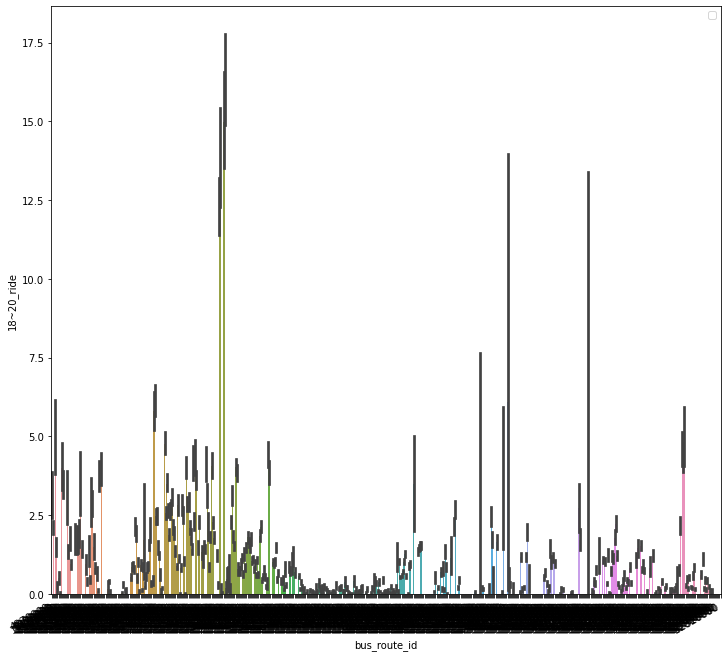

In [ ]:
plt.figure(figsize=(12, 12)) 
sns.barplot(x="bus_route_id", y="18~20_ride", data=traindata)
plt.gcf().autofmt_xdate() # x축의 라벨이 서로 겹치지 않도록 설정
plt.legend(loc=0) # 그래프 상에서 최적의 위치에 범례 표시
plt.show()

No handles with labels found to put in legend.


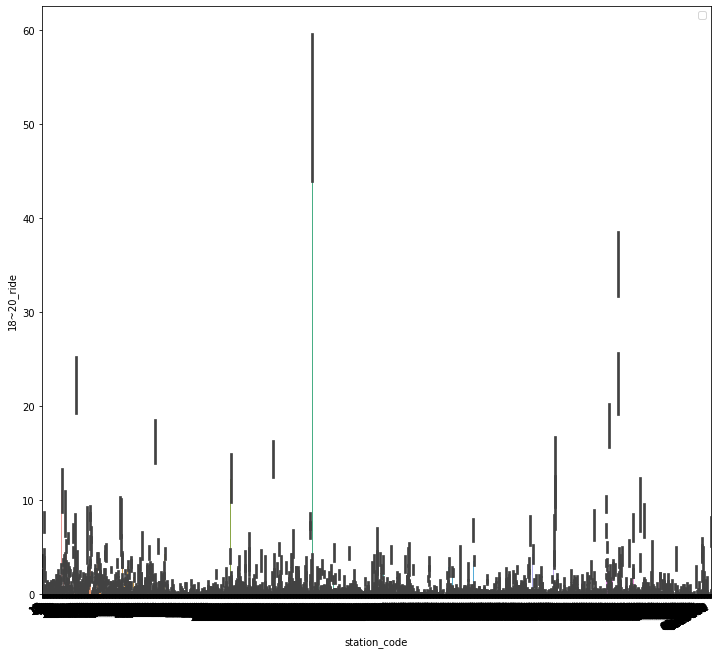

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x="station_code", y="18~20_ride", data=traindata)
plt.gcf().autofmt_xdate() # x축의 라벨이 서로 겹치지 않도록 설정
plt.legend(loc=0) # 그래프 상에서 최적의 위치에 범례 표시
plt.show()

##### 히트맵 시각화

- object형 드롭

In [ ]:
train_drop = train.drop(['date','in_out','station_name'],axis=1)
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   bus_route_id   415423 non-null  int64  
 2   station_code   415423 non-null  int64  
 3   latitude       415423 non-null  float64
 4   longitude      415423 non-null  float64
 5   6~7_ride       415423 non-null  float64
 6   7~8_ride       415423 non-null  float64
 7   8~9_ride       415423 non-null  float64
 8   9~10_ride      415423 non-null  float64
 9   10~11_ride     415423 non-null  float64
 10  11~12_ride     415423 non-null  float64
 11  6~7_takeoff    415423 non-null  float64
 12  7~8_takeoff    415423 non-null  float64
 13  8~9_takeoff    415423 non-null  float64
 14  9~10_takeoff   415423 non-null  float64
 15  10~11_takeoff  415423 non-null  float64
 16  11~12_takeoff  415423 non-null  float64
 17  18~20_ride     415423 non-nul

### 탐색적 데이터 분석 결론
- 월화수목 요일에
- 퇴근시간보다 출근시간에
- 시외보다 시내버스의
- 사용자 높은 특정 노선과 정류소 위주로
- 승차인원의 데이터를 이용해
- 교통체증을 먼저 해결하는 것이 효율적일 거라는 예측을 할 수 있다.


## **2. 데이터 전처리**

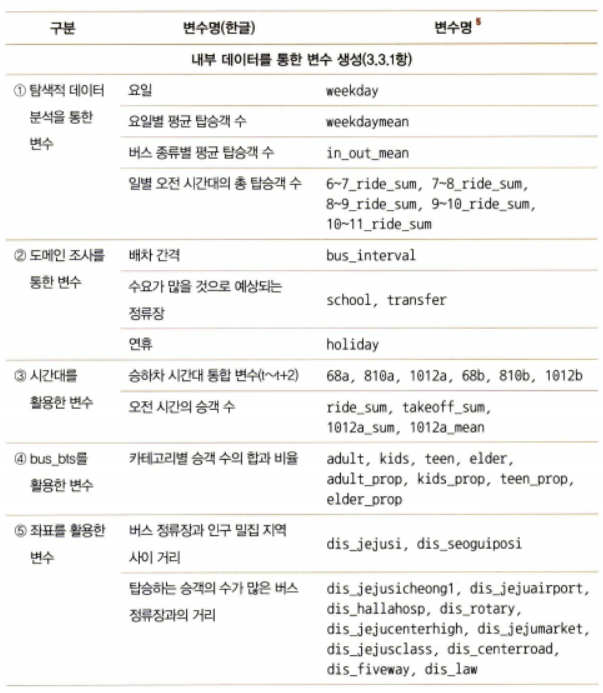

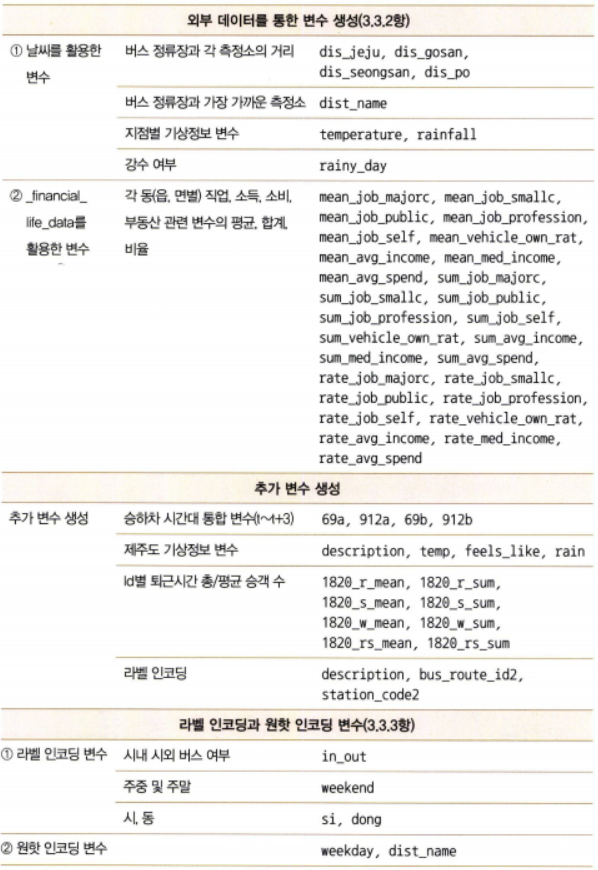

In [ ]:
#train 데이터와 test데이터를 통합하여 전처리 하기위함
train['cue']=0
test['cue']=1
df=pd.concat([train,test],axis=0)

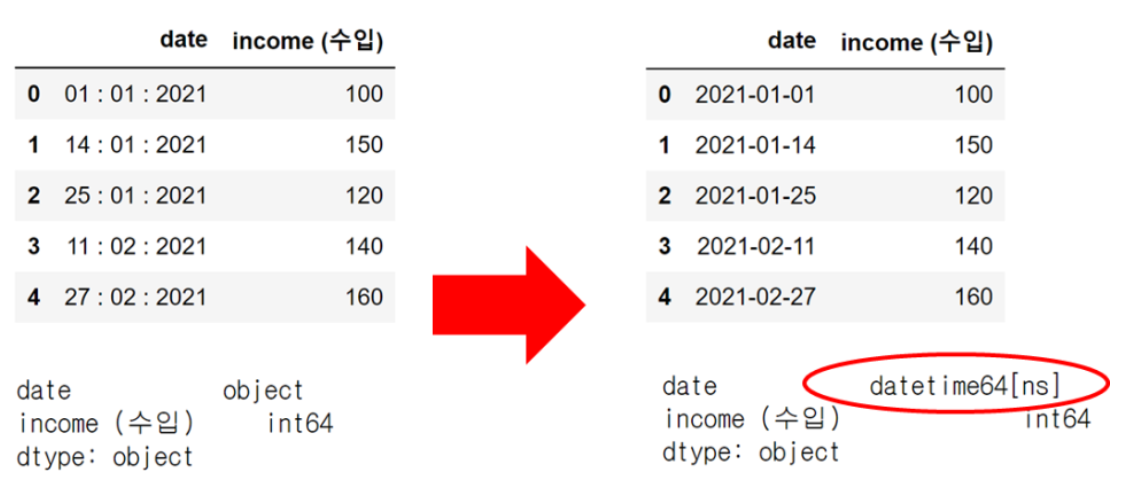

In [ ]:
#datetime 변수형으로 변환
df['date']=pd.to_datetime(df['date'])
#요일 추출 0~6 각각 월요일~일요일
df['weekday']=df['date'].dt.weekday
df[['weekday']].head()

,weekday
0,6
1,6
2,6
3,6
4,6


* 요일별 평균 탑승객 수

해당 요일의 평균 탑승객 수라는 정보를 더하면 모델이 요일별 특성을 잘 학습할 수 있음

In [ ]:
def week_mean() :
    #train데이터에 해당하는 행을 추출
    train_data = df.query('cue==0').reset_index(drop=True)
    
    
    df['weekdaymean'] = 1

    #각 요일에 해당하는 인덱스 추출
    index0 = df.query('weekday==0').index
    index1 = df.query('weekday==1').index
    index2 = df.query('weekday==2').index
    index3 = df.query('weekday==3').index
    index4 = df.query('weekday==4').index
    index5 = df.query('weekday==5').index
    index6 = df.query('weekday==6').index

    #인덱스를 활용해 퇴근시간 평균 탑승객 수로 변경
    df.iloc[index0,-1] = train_data.query('weekday==0')['18~20_ride'].mean()
    df.iloc[index1,-1] = train_data.query('weekday==1')['18~20_ride'].mean()
    df.iloc[index2,-1] = train_data.query('weekday==2')['18~20_ride'].mean()
    df.iloc[index3,-1] = train_data.query('weekday==3')['18~20_ride'].mean()
    df.iloc[index4,-1] = train_data.query('weekday==4')['18~20_ride'].mean()
    df.iloc[index5,-1] = train_data.query('weekday==5')['18~20_ride'].mean()
    df.iloc[index6,-1] = train_data.query('weekday==6')['18~20_ride'].mean()
    
    return df


df = week_mean()

In [ ]:
df[['weekdaymean']].head()

,weekdaymean
0,1.034282
1,1.034282
2,1.034282
3,1.034282
4,1.034282


* 버스 종류별 평균 탑승객 수 구하기

In [ ]:
def inout_mean():
  #마찬가지로 train데이터에 해당하는 행만을 추출
  train_data=df.query('cue==0').reset_index(drop=True)

  df['in_out_mean']=1
  #시내버스와 시외버스로 구분하여 인덱스 추출
  in_index=df.query('in_out=="시내"').index
  out_index=df.query('in_out=="시외"').index
  #인덱스를 활용하여 각 버스 종류에 맞는 평균 탑승 승객 수로 변경
  df.iloc[in_index,-1]=train_data.query('in_out=="시내"')['18~20_ride'].mean()
  df.iloc[out_index,-1]=train_data.query('in_out=="시외"')['18~20_ride'].mean()
  return df

In [ ]:
df=inout_mean()

In [ ]:
df[['in_out_mean']].head()

,in_out_mean
0,2.044345
1,2.044345
2,2.044345
3,1.228499
4,1.228499


* 일변 오전 시간대의 총 탑승객 수

일별 오전 시간대의 탑승객 수를 알면 해당 날짜의 퇴근 시간 탑승객수도 예측 할 수 있음

In [ ]:
#날짜별 오전 시간에 탑승한 총 탑승객 수
f=df.groupby('date')['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride'].sum().reset_index()
#변수명 변경
f.columns=['date','6~7_ride_sum','7~8_ride_sum','8~9_ride_sum','9~10_ride_sum','10~11_ride_sum']


In [ ]:
#기존 데이터 프레임 df에 f를 추가하여 병합
df=pd.merge(df,f,how='left',on='date')

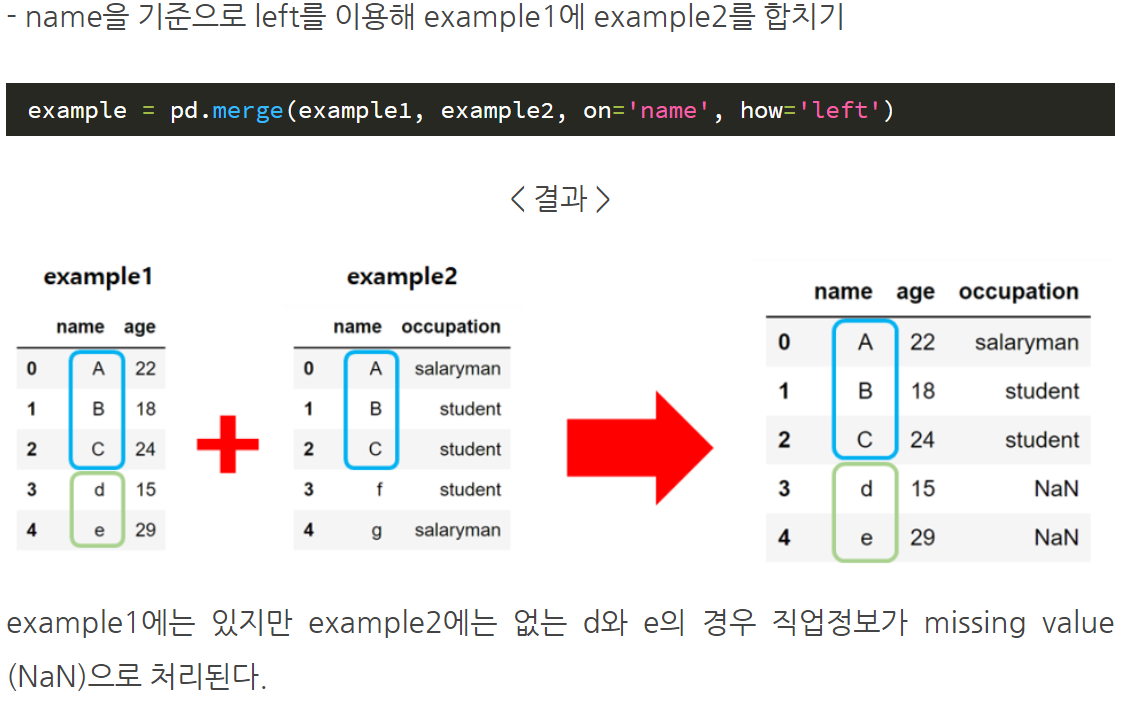

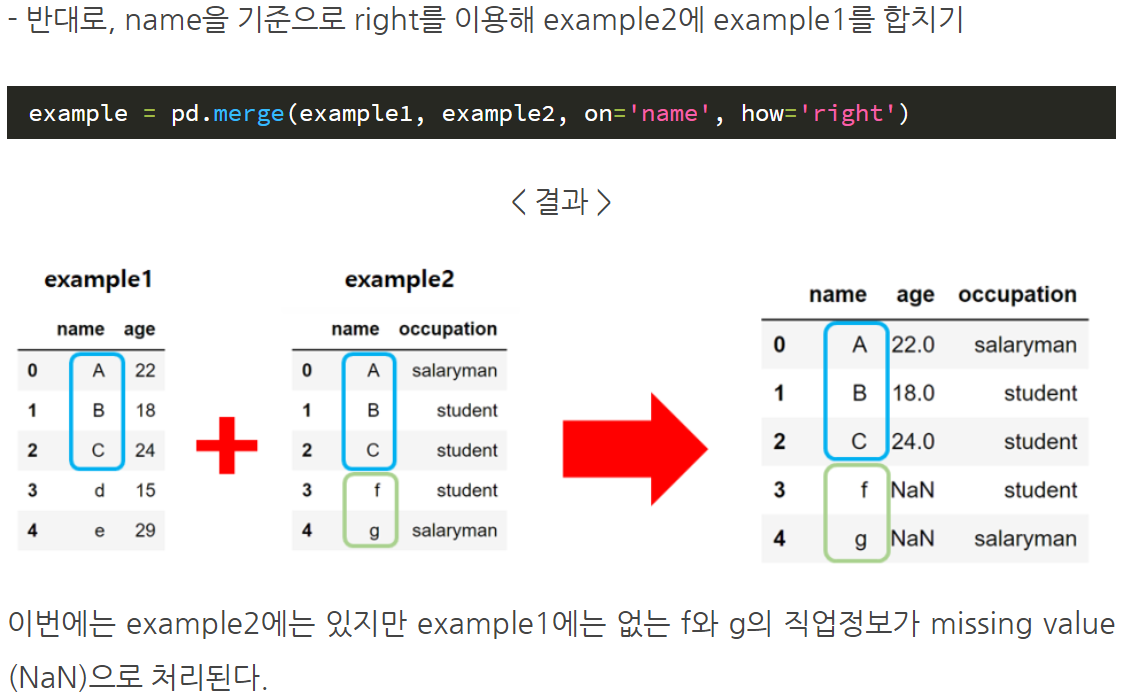

In [ ]:
df[['date','6~7_ride_sum','7~8_ride_sum','8~9_ride_sum','9~10_ride_sum','10~11_ride_sum']].head()


,date,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum
0,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
1,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
2,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
3,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
4,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0


* 도메인 조사를 통한 변수

- 배차 간격
  
  만약 탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호가 모두 같고 i 번째 승객과 i+1번째 승객의 탑승 시간이 일정 시간 차이가 있다면 그 차이는 배차 간격이라고 추측해 볼 수 있다.

In [ ]:
#탑승 날짜를 datetime 형으로 변환합니다.
bts['geton_time2']=pd.to_datetime(bts['geton_time'])
#탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호를 기준으로 정렬시킵니다.
f=bts.sort_values(by=['geton_date','geton_station_code','bus_route_id','geton_time2'],ascending=True).reset_index()

In [ ]:
#이제 데이터가 시간순으로 정렬되었으므로 i번째와 i+1번째 행의 탑승 시간의 차이를 구합니다

#만약 탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호가 모두 일치한다면 시차를 구해
#미리 생성한 리스트 intervla_lst에 추가
#일치하지 않는 다면 다른 버스에 탑승한 것이므로 interval_lst에 0을 추가한다. 

#tqdm라이브러리는 상태 진행률을 알 수 있도록 돕는 툴
from tqdm import notebook
interval_lst=[]
for i in notebook.tqdm(range(0,len(f)-1)):
  if ((f.iloc[i].geton_date == f.iloc[i+1].geton_date) & 
        (f.iloc[i].geton_station_code == f.iloc[i+1].geton_station_code) & 
        (f.iloc[i].bus_route_id == f.iloc[i+1].bus_route_id)):
       
        interval_lst.append(f.iloc[i+1].geton_time2 - f.iloc[i].geton_time2)
  else:
       
      interval_lst.append(0)

interval_lst.insert(0, '0')

In [ ]:
#위의 과정을 마치면 datetime형식에 의해 0 days 01:56:31과 같은 형태의 값이 자동으로 저장됩니다.
#이 형태를 통일시키기 위해 01:56:31과 같이 시:분 :초 형태로 변환시킵니다.
f['interval'] = interval_lst  

f['interval'] = f['interval'].astype(str).str[7:].replace('','00:00:00')
f['bus_route_id'] = f['bus_route_id'].astype(object)

In [ ]:
#위의 시 분 초 형태를 분으로 변환하는 함수 작성
def get_min(time_str):
    h, m, s = time_str.split(':')
    return (int(h) * 3600 + int(m) * 60 + int(s)) / 60

time = []
for i in f['interval'] :
    time.append(get_min(i))

f['time'] = time 
f['time'] = f['time'].astype(int) 
f = f[f['time'] > 3]  #간격이 3분보다 작은 것은 제외
f = f[f['time'] < 180] #간격이 3시간 보다 작은것은 제외

In [ ]:
#버스 노선별 버스 간격의 평균을 csv파일로 저장
data = f.groupby('bus_route_id')['time'].agg([('bus_interval', 'mean')]
                                            ).reset_index()
data['bus_interval'] = data['bus_interval'].astype(int)


data.to_csv('bus_interval.csv', index = False)

In [ ]:

import numpy as np
df['bus_route_id'] = df['bus_route_id'].astype(np.int64)
bus_interval = pd.read_csv("bus_interval.csv")

#기존의 데이터프레임 df에 새로운 변수를 병합
df = pd.merge(df, bus_interval, how = 'left', on = 'bus_route_id')
df['bus_interval'] = df['bus_interval'].fillna(9999)#병합중 생기는 결측치 NA값 처리

In [ ]:
df[['bus_interval']].head()

,bus_interval
0,34.0
1,34.0
2,34.0
3,34.0
4,34.0


수요가 많은 것으로 예상되는 정류장(School, transfer)

In [ ]:
# school 변수 생성
#정류장명에 '고등학교'가 포함되어 있는 행 추출
highschool_station = df[df['station_name'].str.contains('고등학교')]
#'고등학교'가 포함되어 있는 정류장명을 중복 없이 리스트에 저장
highschool = list(highschool_station['station_name'].unique())
#정류장명에 '대학교'가 포함되어 있는 행 추출
university_station = df[df['station_name'].str.contains('대학교')]
#'대학교'가 포함되어 있는 정류장명을 중복 없이 리스트에 저장
university = list(university_station['station_name'].unique())


def schoolstation(x):
    
    if x in highschool:
        return 1
    
    elif x in university:
        return 1
    
    else:
        return 0


df['school'] = df['station_name'].apply(schoolstation)

In [ ]:
df[['school']].head()

,school
0,0
1,0
2,0
3,0
4,0


In [ ]:
#환승 정류장도 동일한 방법으로 적용
transfer_station = df[df['station_name'].str.contains('환승')]
transfers = list(transfer_station['station_name'].unique())

airport_station = df[df['station_name'].str.contains('공항')]
airport = list(airport_station['station_name'].unique())

terminal_station = df[df['station_name'].str.contains('터미널')]
terminal = list(terminal_station['station_name'].unique())


def transfer_station(x):
    if x in transfers:
        return 1
    elif x in airport:
        return 1
    elif x in terminal:
        return 1
    else:
        return 0

df['transfer'] = df['station_name'].apply(transfer_station)

In [ ]:
df[['transfer']].head()

,transfer
0,0
1,0
2,0
3,1
4,0


공유일에는 학교와 회사에 가지 않으므로 평소와 패턴이 다르게 나타난다. 이를 반영하기 위해 holiday변수를 생성

In [ ]:

def holiday(x):
    # 공휴일이라면 1을 반환
    if x in ['2019-09-12','2019-09-13','2019-09-14','2019-10-03','2019-10-09']:
        return 1
    else:
        # 공휴일이 아니라면 0을 반환
        return 0

   
df['holiday'] = df['date'].apply(holiday)
df[['holiday']].head()

,holiday
0,0
1,0
2,0
3,0
4,0


주어진 과제는 오전시간 6시부터 12시의 데이터만으로 퇴근 시간의 버스 승차 인원을 예측해야 된다.

최종적으로 예측하려는 퇴근시간때의 간격은 2시간 간격임

In [ ]:
# 오전 시간대에 2시간 동안 승차한 인원수의 합계
df['68a'] = df['6~7_ride'] + df['7~8_ride'] 
df['810a'] = df['8~9_ride'] + df['9~10_ride']
df['1012a'] = df['10~11_ride'] + df['11~12_ride']

# 오전 시간대에 2시간 동안 하차한 인원수의 합계
df['68b'] = df['6~7_takeoff'] + df['7~8_takeoff'] 
df['810b'] = df['8~9_takeoff'] + df['9~10_takeoff']
df['1012b'] = df['10~11_takeoff'] + df['11~12_takeoff']

In [ ]:
df[['68a', '810a', '1012a', '68b', '810b', '1012b']].head()

,68a,810a,1012a,68b,810b,1012b
0,1.0,7.0,8.0,0.0,0.0,0.0
1,5.0,6.0,11.0,0.0,0.0,0.0
2,2.0,2.0,0.0,0.0,0.0,0.0
3,17.0,32.0,30.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# 오전 시간(6시~12시)에 승차한 승객 수의 합계
df['ride_sum'] = df[['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', 
                     '10~11_ride', '11~12_ride']].sum(axis=1)

# 오전 시간(6시~12시)에 하차한 승객 수의 합계
df['takeoff_sum'] = df[['6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff',
                        '10~11_takeoff', '11~12_takeoff']].sum(axis=1)

In [ ]:
df[['ride_sum', 'takeoff_sum']].head()

,ride_sum,takeoff_sum
0,16.0,0.0
1,22.0,0.0
2,4.0,0.0
3,79.0,0.0
4,0.0,1.0


출퇴근 시간 인기 있는 버스 노선이 존재하여 출근 시간 승차 인원이 많은 버스 노선은 퇴근 시간 또한 숭차 인원이 많을 것으로 예상할 수 있다.

위에서 만든 '노선'기준을 추가하여 노선별 오전 시간대의 총,평균 탑승객 수를 구함.

In [ ]:
#bus_route_id와 station_code를 결합해 route_station을 생성
df['route_station'] = df['bus_route_id'].astype(str) + ',' \
                    + df['station_code'].astype(str)

#버스 노선별 오전 시간의 총 탑승객 수와 평균 탑승객 수 구하기
data = df.groupby(['route_station'])['1012a'].agg({'sum', 'mean'}).reset_index()

#변수명 변경
data.rename(columns = {'mean':'1012a_mean', 'sum':'1012a_sum'}, inplace=True)

#데이터 병합
df = pd.merge(df, data, how='left', on='route_station')

In [ ]:
df[['1012a_mean','1012a_sum']].head()

,1012a_mean,1012a_sum
0,5.304348,244.0
1,11.608696,534.0
2,2.304348,106.0
3,36.673913,1687.0
4,0.564103,22.0


*카테고리별 승객 수의 합과 비율

- user_category 변수를 활용해 학습 데이터에 승객 정보를 추가하면 특정 버스 정류장에 어떤 승객이 많이 탑승하는지 알 수 있음.

In [ ]:
# 카테고리별 승객 수의 합
def category_people():
    # df와 병합을 위해 bus_route_id의 타입을 str로 변환
    bts['bus_route_id'] = bts['bus_route_id'].astype(str)

    #bus_route_id와 user_category별 승객 수의 합
    f = bts.groupby(
        ['bus_route_id','user_category']
    )['user_count'].agg([('승객수', 'sum')]).reset_index()

    #pivot_Table을 사용하면 groupby와 마찬가지로 변수에 대해 그룹별 통계값을 구할 수 있다
    #values에는 통계값을 구할 변수 index에는 그룹을 나눌 변수
    g = pd.pivot_table(f, values='승객수', index='bus_route_id', 
                       columns='user_category', fill_value=0).reset_index()
    g.columns = ['bus_route_id', 'adult','kids','teen','elder','jang','jang2',
                 'ugong','ugong2']
    g = g[['bus_route_id', 'adult','kids','teen','elder']]

    #데이터 병합
    merge_data = pd.merge(df, g, how='left', on='bus_route_id')
                 
    return merge_data


df['bus_route_id'] = df['bus_route_id'].astype(str)
df = category_people()

In [ ]:
df[['adult','kids','teen','elder']].head()

,adult,kids,teen,elder
0,8158.0,72.0,38.0,0.0
1,8158.0,72.0,38.0,0.0
2,8158.0,72.0,38.0,0.0
3,8158.0,72.0,38.0,0.0
4,8158.0,72.0,38.0,0.0


위 과정을 통해 카테고리별 승객 수의 합이라는 변수를 생성했다면 bus_route_id의 user_category에 해당하는 승객 수를 모든 승객 수로 나누어 카테고리별 비율 변수 생성

In [ ]:
#카테고리별 승객 수의 비율
def category_people_ratio() :

    #bus_route_id별 user_category의 전체 합
    f_all = bts.groupby('bus_route_id'
                       )['user_count'].agg([('전체', 'sum')]).reset_index()

    #bus_route_id와 user_category별 승객 수의 합
    f_sum = bts.groupby(['bus_route_id','user_category']
                       )['user_count'].agg([('승객수', 'sum')]).reset_index()
    
    #승객 수의 합을 전체 합으로 나눠 비율을 구함
    data = pd.merge(f_all, f_sum, on='bus_route_id')
    data['비율'] = data['승객수'] / data['전체']

   
    data = pd.pivot_table(data, values='비율', index='bus_route_id', 
                          columns='user_category',fill_value=0).reset_index()
    data.columns = ['bus_route_id', 'adult_prop','kids_prop','teen_prop',
                    'elder_prop','jang_prop','jang2_prop','ugong_prop','ugong2_prop']
    f = data[['bus_route_id', 'adult_prop','kids_prop','teen_prop','elder_prop']]

    
    merge_data = pd.merge(df, f, how='left', on='bus_route_id')

    return merge_data


df = category_people_ratio()

In [ ]:
df[['adult_prop','kids_prop','teen_prop','elder_prop']].head()

,adult_prop,kids_prop,teen_prop,elder_prop
0,0.986696,0.008708,0.004596,0.0
1,0.986696,0.008708,0.004596,0.0
2,0.986696,0.008708,0.004596,0.0
3,0.986696,0.008708,0.004596,0.0
4,0.986696,0.008708,0.004596,0.0


In [ ]:
# 연속형 변수의 결측치를 평균값으로 처리할 수 있도록 SimpleImputer를 사용
from sklearn.impute import SimpleImputer  


na_col = ['adult', 'kids', 'teen', 'elder', 'adult_prop', 'kids_prop', 'teen_prop',
          'elder_prop']
 
imputer = SimpleImputer(strategy="mean")

df[na_col] = pd.DataFrame(imputer.fit_transform(df[na_col]), columns = na_col)

* 좌표를 이용한 변수

인적이 드문 지역의 버스 정류장에서는 버스가 많이 다니지 않고 버스에 탑승하는 승객이 매우 적다.
즉 버스 정류장의 위치는 승차 인원에 영향을 줄 수 있는 요소

In [ ]:
import geopy.distance

coords_jejusi = (33.500770, 126.522761) # 제주시의 위도 경도
coords_seoquiposi = (33.259429, 126.558217) # 서귀포시의 위도 경도

# 제주시와의 거리
df['dis_jejusi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejusi).km for i in range(len(df))]
# 서귀포시와의 거리
df['dis_seoquiposi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_seoquiposi).km for i in range(len(df))]

In [ ]:
#각 정류장으로부터 제주시 서귀포시까지의 거리
df[['dis_jejusi', 'dis_seoquiposi']].head()

,dis_jejusi,dis_seoquiposi
0,2.954920,26.256744
1,3.720275,26.403025
2,5.036124,25.893305
3,2.864166,27.997494
4,29.040353,13.574693


* 탑승하는 승객의 수가 많은 버스 정류장과의 거리

사람이 많이 타는 버스 정류장 근처는 유동인구가 많은 지역이다.

이 지역 버스 정류장과 가까울수록 탑승객 수가 많을 것이라고 예상

-> 학습 데이터를 퇴근시간 승차인원을 기준으로 내림차순으로 정렬한뒤 상위 10개 버스 정류장 좌표와의 거리 변수 생성

In [ ]:
# 승차 인원 상위 10개의 버스정류장 좌표
coords_jejusicheong1 = (33.49892, 126.53035) # 제주시청(광양 방면)의 위도 경도
coords_jejuairport = (33.50661, 126.49345) # 제주국제공항(구제주 방면)의 위도 경도
coords_hallahosp = (33.48963, 126.486) # 한라병원의 위도 경도
coords_rotary = (33.49143, 126.49678) # 제주도청신제주로터리의 위도 경도
coords_jejucenterhigh = (33.48902, 126.5392) # 제주중앙여자고등학교의 위도 경도
coords_jejumarket = (33.51315, 126.52706) # 동문시장의 위도 경도
coords_jejusclass = (33.47626, 126.48141) # 제주고등학교/중흥S클래스의 위도 경도
coords_centerroad = (33.51073, 126.5239) # 중앙로(국민은행)의 위도 경도
coords_fiveway = (33.48667, 126.48092) # 노형오거리의 위도 경도
coords_law = (33.49363, 126.53476) # 제주지방법원(광양 방면)의 위도 경도

# 승차 인원 상위 10개의 버스정류장 좌표와 각 정류장의 지구 표면에서 두 점 사이의 거리를 구함
df['dis_jejusicheong1'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejusicheong1).km for i in range(len(df))]
df['dis_jejuairport'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejuairport).km for i in range(len(df))]
df['dis_hallahosp'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_hallahosp).km for i in range(len(df))]
df['dis_rotary'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_rotary).km for i in range(len(df))]
df['dis_jejucenterhigh'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejucenterhigh).km for i in range(len(df))]
df['dis_jejumarket'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejumarket).km for i in range(len(df))]
df['dis_jejusclass'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejusclass).km for i in range(len(df))]
df['dis_centerroad'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_centerroad).km for i in range(len(df))]
df['dis_fiveway'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_fiveway).km for i in range(len(df))]
df['dis_law'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_law).km for i in range(len(df))]

In [ ]:
df[['dis_jejusicheong1', 'dis_jejuairport', 'dis_hallahosp', 'dis_rotary',
    'dis_jejucenterhigh', 'dis_jejumarket', 'dis_jejusclass', 'dis_centerroad',
    'dis_fiveway', 'dis_law']].head()

,dis_jejusicheong1,dis_jejuairport,dis_hallahosp,dis_rotary,dis_jejucenterhigh,dis_jejumarket,dis_jejusclass,dis_centerroad,dis_fiveway,dis_law
0,3.547051,1.853545,0.719000,0.330360,4.226827,4.030090,1.897319,3.632769,1.243233,3.835351
1,4.336294,2.057088,0.088058,1.109489,5.029806,4.704476,1.501101,4.311404,0.493820,4.640172
2,5.611975,3.316057,1.448297,2.410695,6.156335,6.069228,0.957447,5.675079,0.873821,5.840420
3,3.596334,0.127071,1.889890,1.639020,4.718848,3.311940,3.432034,2.967079,2.376926,4.149595
4,29.106917,28.818039,26.819826,27.283840,28.424280,30.466215,25.277182,30.112554,26.384623,28.724248


* 라벨 인코딩 원핫 인코딩

In [ ]:
#시내버스와 시외버스를 구분하는 변수가 문자형이므로 숫자형으로 변환
df['in_out'] = df['in_out'].map({'시내':0, '시외':1})


In [ ]:
df[['in_out']].head()


,in_out
0,1
1,1
2,1
3,0
4,0


In [ ]:
#주중은 0 주말은 1로 값을 치환
def is_weekend(x):
    if x == 5: # 토요일
        return 1
    elif x == 6: # 일요일
        return 1
    else:
        return 0
  
df['weekend'] = df['weekday'].apply(is_weekend)

In [ ]:
df[['weekend']].head()

,weekend
0,1
1,1
2,1
3,1
4,1


## **3. 모델 구축과 검증**

In [ ]:
# 문자 형태의 변수 추출
object_column = list(df.columns[df.dtypes == 'object'])
# 문자형 변수 제거
df = df.drop(object_column, axis='columns')

# datetime 형태의 변수 추출
datetime_column = list(df.columns[df.dtypes == 'datetime64[ns]'])
# datetime형 변수 제거
df = df.drop(datetime_column, axis='columns')

print(object_column + datetime_column)

['date', 'station_name', 'route_station']


In [ ]:
df.shape

(643593, 83)

In [ ]:
# 학습 데이터
x_train = df.query("cue=='0'").drop(['cue', '18~20_ride'], axis='columns')
# 타겟 변수
y_train = df.query("cue=='0'")['18~20_ride']
# 테스트 데이터
x_test = df.query("cue=='1'").drop(['cue', '18~20_ride'], axis='columns')

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(415423, 81)
(415423,)
(228170, 81)


In [ ]:
x_train.head(3)

,id,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,weekdaymean,in_out_mean,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum,bus_interval,school,transfer,holiday,68a,810a,1012a,68b,810b,1012b,ride_sum,takeoff_sum,1012a_mean,1012a_sum,adult,...,teen,elder,adult_prop,kids_prop,teen_prop,elder_prop,dis_jejusi,dis_seoquiposi,dis_jejusicheong1,dis_jejuairport,dis_hallahosp,dis_rotary,dis_jejucenterhigh,dis_jejumarket,dis_jejusclass,dis_centerroad,dis_fiveway,dis_law,69a,912a,69b,912b,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,1820_rs_mean,1820_rs_sum,bus_route_id2,station_code2,weekend,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,4270000,1,344,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,1.0,7.0,8.0,0.0,0.0,0.0,16.0,0.0,5.304348,244.0,8158.0,...,38.0,0.0,0.986696,0.008708,0.004596,0.0,2.954920,26.256744,3.547051,1.853545,0.719000,0.330360,4.226827,4.030090,1.897319,3.632769,1.243233,3.835351,3.0,13.0,0.0,0.0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,1.466667,44.0,625,322,1,0,0,0,0,0,0,1
1,1,4270000,1,357,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,5.0,6.0,11.0,0.0,0.0,0.0,22.0,0.0,11.608696,534.0,8158.0,...,38.0,0.0,0.986696,0.008708,0.004596,0.0,3.720275,26.403025,4.336294,2.057088,0.088058,1.109489,5.029806,4.704476,1.501101,4.311404,0.493820,4.640172,9.0,13.0,0.0,0.0,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,5.366667,161.0,625,335,1,0,0,0,0,0,0,1
2,2,4270000,1,432,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.034282,2.044345,2942.0,4518.0,5682.0,6275.0,6774.0,34.0,0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,2.304348,106.0,8158.0,...,38.0,0.0,0.986696,0.008708,0.004596,0.0,5.036124,25.893305,5.611975,3.316057,1.448297,2.410695,6.156335,6.069228,0.957447,5.675079,0.873821,5.840420,2.0,2.0,0.0,0.0,3.104381,2409.0,2.169559,1625.0,1.034282,54306.0,1.600000,48.0,625,408,1,0,0,0,0,0,0,1


### **1. 모델 설정**

**모델은 랜덤 포레스트!**

### **2. 변수 선택**

**86개 -> 68개**

In [ ]:
input_var=['in_out', 'latitude', 'longitude','6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride', 
           '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
           'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 
           'dis_jejusi', 'dis_jejusicheong1', 'dis_jejuairport', 'dis_hallahosp', 'dis_rotary','dis_jejucenterhigh',       
           'dis_jejumarket', 'dis_centerroad', 'dis_jejusclass', 'dis_fiveway', 'dis_law', 
           'weekend', 'holiday', 'ride_sum', 'takeoff_sum', '1820_r_mean', '1820_s_mean', '1820_w_mean', '1820_rs_mean',
           'station_code2', 'bus_route_id2', '6~7_ride_sum', '7~8_ride_sum', '8~9_ride_sum', '9~10_ride_sum', '10~11_ride_sum', 
           'in_out_mean', 'weekdaymean', 'adult', 'kids', 'teen', 'elder', 'adult_prop', 'kids_prop', 'teen_prop', 'elder_prop',
           '68a', '810a', '1012a', '68b', '810b', '1012b', '69a', '912a', '69b', '912b']

### **3. 하이퍼파라미터 튜닝**

**그리드 서치 vs 랜덤 서치**

In [ ]:
#랜덤 서치
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1217)

# 탐색할 하이퍼파라미터 구간 지정
params = {'n_estimators': stats.randint(200, 500),'max_features': stats.randint(4, 8),'min_samples_leaf': stats.randint(1, 5)}
         # n_estimators : 결정 트리의 개수, max_features : 최적의 분할을 위해 고려할 피처수, min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수(과적합 제어 용도)
         
# RandomizedSearchCV를 이용해 최적의 하이퍼파라미터 탐색
rand_cv = RandomizedSearchCV(rf, param_distributions = params, n_iter=10, cv = 3, random_state = 1217, n_jobs=-1)
rand_cv.fit(x_train[input_var], y_train)

# 최적의 하이퍼파라미터 값과 성능 출력
print('최적 하이퍼파라미터: ', rand_cv.best_params_)
print('최적 하이퍼파라미터의 성능(RMSE): {:.4f}'.format(np.sqrt(rand_cv.best_score_)))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


최적 하이퍼파라미터:  {'max_features': 7, 'min_samples_leaf': 2, 'n_estimators': 400}
최적 하이퍼파라미터의 성능(RMSE): 0.8720


### **4. 최종 모델 구축**

In [ ]:
# submission_sample 데이터 로드
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3장-퇴근시간 버스 승차인원 예측/submission_sample.csv')

In [ ]:
# 찾은 하이퍼파라미터 적용한 랜덤 포레스트 모델 정의
model = RandomForestRegressor(random_state=1217, max_features=7, min_samples_leaf=2, n_estimators=400, n_jobs=-1)
# 모델 학습
model.fit(x_train[input_var], y_train)

# x_train 데이터에 대한 예측값 생성
pred = model.predict(x_train[input_var])
# 성능 확인
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, pred))

1.2283341782783914

In [ ]:
# x_test 데이터에 대한 예측값 생성
y_pred = model.predict(x_test[input_var])
# 예측값 저장
submit['18~20_ride'] = y_pred
# 제출 파일 생성
submit.to_csv('dacon_submission.csv', index = False)

## **4. 성능 향상을 위한 방법**

※ 예시 코드

교재에서 제시된 1등 코드 최종 5개의 모델의 예측 submission 파일 5개를 이용한 앙상블 예시

- 결과 submission 간 상관계수 확인
- submission 파일 간 앙상블(가중산술평균, 멱 평균)
- 최종 예측값 도출

In [ ]:
# 결괏값 간 상관계수 확인을 위해 상관계수 행렬을 구한다.

'''
sub.list = [] # 작업 경로에 있는 파일 중 확장자가 .csv인 파일을 담을 리스트 생성
fname.list [] # 확장자를 제외한 파일명을 담을 리스트 생성

for filename in os.listdir()： # 작업 경로에 있는 모든 파일의 리스트 불러오기
    fname, ext = os.path.splitext(filename) # filename을 파일명과 확장자로 분리
    if ext == '.csv': # 확장자가 .csv인 파일인 경우
        sub_list.append(filename) # filename을 sub_list에 추가
        fname_list.append(fname) # 파일명을 fname_list에 추가

# 상관계수 행렬을 저장할 데이터프레임 생성
corr_df = pd.DataFrame()

for file in sub_list:
    # 각 submission 파일의 18〜20_ride 변수를 sub_df 에 저장
    sub_df = pd.read_csv(file, engine='python').iloc[:,1:]
    # 변수명을 파일의 이름으로 지정
    sub_df.columns = [str(file)]
    # sub_df 를 corr_df 에 병합
    corr_df = pd.concat([corr_df, sub_df], axis=1)
'''

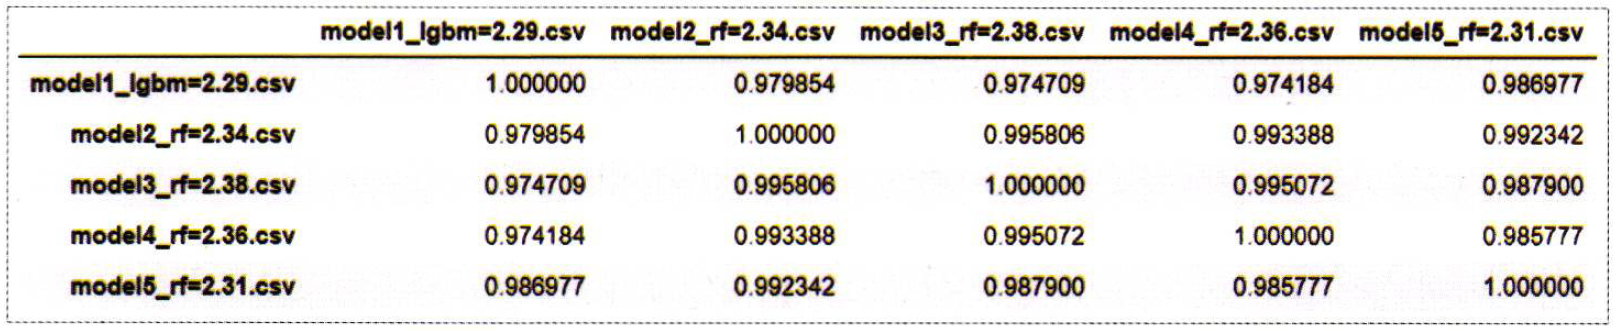

In [ ]:
# cor값을 나타낸 데이터프레임 표시
'''
# 상관계수 행렬의 각 행의 평균을 구해 corr_list에 저장
corr_list = np.array(corr_df.corr().mean(axis=0))

model.list = [] # 모델명을 담을 리스트 생성
public_rmse_list = [] # 각 submission 파일의 임시 스코어를 담을 리스트 생성

for fname in fname_list:
    model = fname.split('=')[0] # '=' 기호를 기준으로 모델명을 분리
    model_list.append(model) # 모델명을 model_list에 추가

    score = fname.split('=')[-1] # '=' 기호를 기준으로 임시 스코어를 분리
    score = float (score) # 실수형으로 변환
    public_rmse_list.append(score) # 임시 스코어를 public_rmse_list에 주가

# model_list, public_rmse_list, corr_list를 변수로 하는 데이터프레임 생성
score_df = pd.DataFrame({'model': model_list, 'public_rmse': public_rmse_list, 'cor': corr_list})
'''

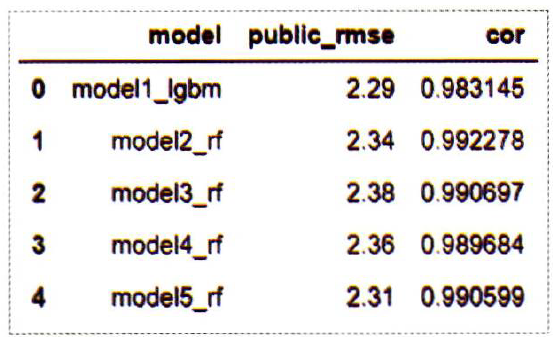

In [ ]:
# 산점도 생성
'''
pit.figure(figsize=(10,5))
# 점의 사이즈가 30인 산점도
graph = sns.scatterplot(x="cor", y="public_rmse", data=score_df, s=30)
# 각 점에 대한 모델명 표시
for idx in range(0, score_df.shape[0]):
    graph.text(score_df.cor[idx]+0.00005 , score_df.public_rmse[idx]-0.00003, score_df.model[idx], horizontalalignment='left', size='medium', color='black', weight='semibold')

# x축 범위 지정
pit.xlim((score_df.cor.min()-0.001, score_df.cor.max0+0.001))
# y축 범위 지정
pit.ylim((score_df.public_rmse.min()-0.005, score_df.public_rmse.max()+6.005))
pit.grid() # 격자 무늬
'''

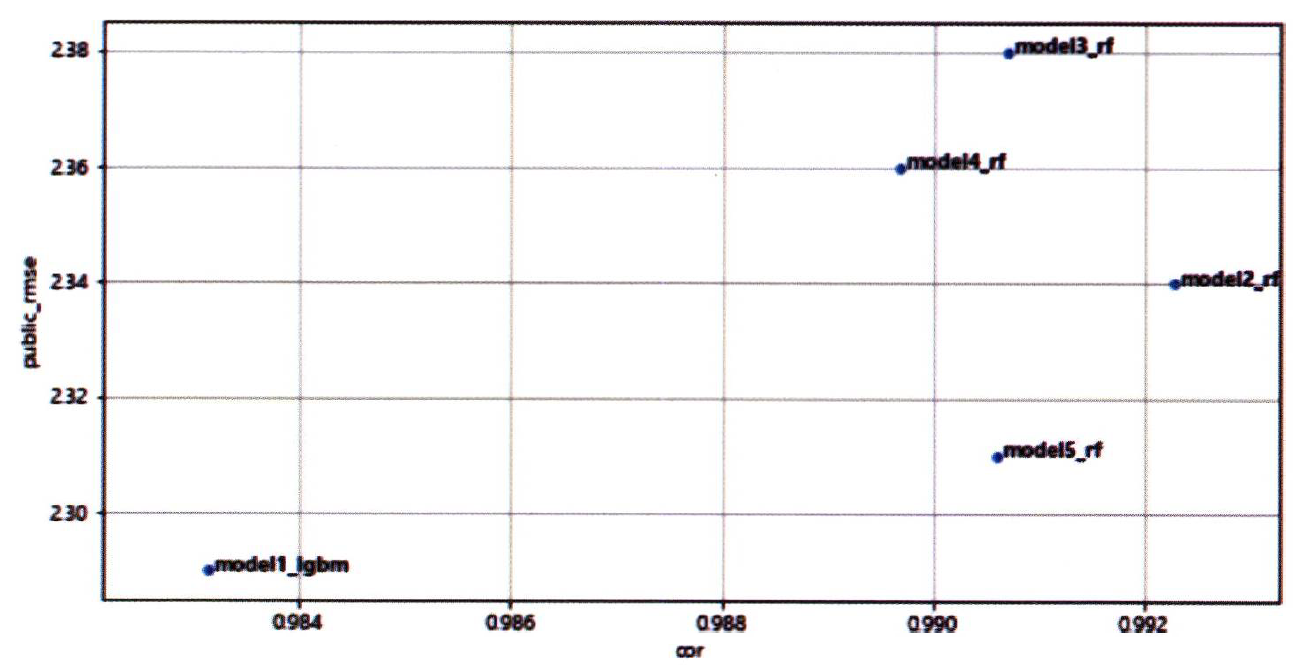

In [ ]:
# 여러가지 앙상블 기법 (가중산술평균, 멱 평균)

'''
# 첫번째, 상관계수가 상대적으로 낮고 임시 스코어가 낮은 'model1_lgbm=2.29.csv'과 'model5_rf=2.31.csv'을 이용(p=21인 멱 평균)
ensemble_dir = "C：/dacon/ch03/submission/Ensemble1/"
# Ensemblel 폴더가 없다면 Ensemblel 폴더를 생성
if not os.path.isdir(ensemble_dir):
    os.mkdir(ensemble_dir)

# Ensemblel 폴더로 파일 이동
import shutil
shutil.move(sub_dir + 'model1_lgbm=2.29.csv', ensemble_dir + 'model1_lgbm=2.29.csv')
shutil.move(sub_dir + 'model5_rf=2.31.csv', ensemble_dir + 'model5_rf=2.31.csv')

# model 1_lgbm=2.29.csv, model5_rf=2.31 .csv 역 평균
nf = 0
for f in os.listdir(ensemble_dir):
    ext = os.path.splitext(f)[-1 ] # 'Ensemblel' 폴더에 있는 파일의 확장자를 분리
    
    if ext == ' .csv':
        sub = pd.read_csv(ensemble_dir + f) # 확장자명이 .csv라면 해당 데이터를 로드
    else:
        continue # 확장자명이 .csv가 아니라면 for 문을 종료
        
    if len(sub.columns) != 2:
        continue # 로드한 데이터의 변수의 수가 2개가 아니라면 for문을 종료

    # 파일의 확장자명이 .CSV이고, 변수의 수가 2개인 경우에만 밑의 조건문이 실행됩니다.
    if nf == 0:
        sub_df = sub # 해당 데이터(sub)를 sub_df에 저장
    else:
        sub_df = pd.merge(sub_df, sub, on="id") # 해당 데이터를 sub_df와 병합
    
    nf += 1
p = 21 # 하이퍼파라미터이므로 최적의 값을 찾아야 합니다.
    
# 파일의 개수(nf)가 2개 이상인 경우에만 밑의 조건문이 실행됩니다.
if nf >= 2:
    pred = 0
    
    # 앞서 소개한 멱 평균의 식을 나타낸 코드입니다.
    for j in range(nf):
        pred = pred + sub_df.iloc[：,j+1]**p
    pred = pred / nf
    pred = pred**(1/p)
    
    # 멱 평균 결과를 대입하여 데이터프레임 submit을 생성하고, CSV 파일로 저장
    submit = pd.DataFrame({'id': sub_df.id, '18~20_ride': pred})
    fname = "ensemble_model1+model5.csv"
    submit.to_csv(fname, index=False)

# 두번째, 남은 세개의 파일 중 임시 스코어값이 제일 높은 파일을 제외한 나머지 두 파일 앙상블(p=21인 멱 평균)
ensemble_dir = "C：/dacon/ch03/submission/Ensemble2/"

# Ensemble2 폴더가 없다면 Ensemble2 폴더를 생성
if not os.path.isdir(ensemble_dir):
    os.mkdir(ensemble_dir)

# Ensemble2 폴더로 파일 이동
import shutil
shutil.move(sub_dir + 'model2_rf=2.34.csv', ensemble_dir + 'model2_rf=2.34.csv')
shutil.move(sub_dir + 'model4_rf=2.36.csv', ensemble_dir + 'model4_rf=2.36.csv')

# model2_rf=2.34.csv, model4_rf=2.36.csv 멱 평균
nf = 0
for f in os.listdir(ensemble_dir):
    ext = os.path.splitext(f)[-1] # ,Ensemble2, 폴더에 있는 파일의 확장자를 분리
    
    if ext == '.csv':
        sub = pd.read_csv(ensemble_dir + f) # 확장자명이 .csv라면 해당 데이터를 로드
    else:
        continue # 확장자명이 .csv가 아니라면 for 문을 종료
    
    if len(sub.columns) != 2:
        continue # 로드한 데이터의 변수의 수가 2개가 아니라면 for 문을 종료

    # 파일의 확장자명이 .csv이고, 변수의 수가 2개인 경우에만 밑의 조건문이 실행됩니다.
    if nf == 0:
        sub_df = sub # 해당 데이터(sub)를 sub_df에 저장
    else:
        sub_df = pd.merge(sub_df, sub, on="id") # 해당 데이터를 sub_df와 병합
    nf += 1

p = 21 # 하이퍼파라미터이므로 최적의 값을 찾아야 합니다.

# 파일의 개수(nf)가 2개 이상인 경우에만 밑의 조건문이 실행됩니다.
if nf >= 2:
    pred = 0

    # 앞서 소개한 멱 평균의 식을 나타낸 코드입니다.
    for j in range(nf):
        pred = pred + sub_df.iloc[：,j+1]**p
    pred = pred / nf
    pred = pred**(1/p)
    
    # 멱 평균 결과를 대입하여 데이터프레임 submit을 생성하고, csv 파일로 저장
    submit = pd.DataFrame({'id': sub_df.id, '18~20_ride': pred})
    fname = "ensemble_model2+model4.csv"
    submit.to_csv(fname, index=False)
'''

In [ ]:
# 최종 3개의 파일을 가중산술평균을 이용해 앙상블

'''
# 앙상블 파일 로드
first = pd.read_csv('ensemble_model1+model5.csv')
second = pd.read_csv('ensemble.model2+model4.csv')
third = pd.read_csv('model3_rf=2.38.csv')

# 가중산술평균(각각 가중치 부여)
w_mean = 0.22*first['18~20_ride'] + 0.30*second['18~20_ride'] + (0.48*thirdrd['18~20_ride']
                                                                 
# 최종 submission 파일 생성
sub['18~20_ride'] = w_mean
sub.to_csv('final_submission.csv', index=False)
'''